# Univariate and Bivariate Analysis- Understanding the Target Variable


This Jupyter Notebook covers the solution implementation of the second milestone of 3-Project series on End to End ML for Binary Classification.


## Data 

We are using the [Rainfall prediction dataset from Kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) which cotains daily weather observations from numerous Austrailian weather stations.


## Problem Statement
We aim to answer a very simple question - Whether it will rain tomorrow in Australia or not. 

## Importing Libraries

In [34]:
##importing libraries
import numpy as np  #for algebraic operations on arrays
import pandas as pd  #for data exploration and manipulation


##plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [35]:
data_path = './data/weatherAUS.csv'

##loading the dataset into a dataframe
df = pd.read_csv(data_path)

##preview the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [36]:
##to check the dimensions of the dataset
df.shape

(142193, 24)

In [37]:
##transposing the data to get a good understanding
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


There are a lot of variables/features here but the most interesting feature is the last column `RainTomorrow`. This is the target variable for our ML model which we want to predict.

It has 2 values:
* Yes - It will rain tomorrow.
* No - It will not rain tomorrow.


In [38]:
##As per the description of the dataset, 
##we have to drop RISK_MM column

df.drop(['RISK_MM'], axis=1, inplace=True)

In [39]:
##checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

**Interpretting Data Information**
* We have 142193 rows, any column that contains lesser number of rows has missing values.
* We have 24 columns.
* There are categorical features that have data type `float64`.
* There are numerical features that have data type `object`.

In [40]:
##statistical summary of numerical variables
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [41]:
##summary statistics for categorical columns
df.describe(include=['object'])


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2017-01-09,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


## Univariate Analysis

In [42]:
##exploring the target variable
##checking for missing values
df['RainTomorrow'].isnull().sum()

0

In [43]:
##number of unique values
df['RainTomorrow'].nunique()

2

In [44]:
##frequency distribution of labels
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [45]:
##ratio of freq distribution of values
df['RainTomorrow'].value_counts() / len(df)

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

## Plotting the frequency of the 2 labels

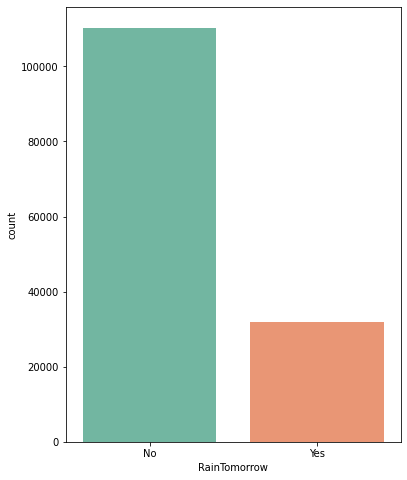

In [46]:
##visualizing the frequency distribution
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set2")
plt.show()

### Takeaways from Univariate Analysis

1. We have 2 categories of values, `yes` and `No`.
2. We have far more negative(No) values than psitive(Yes) values.
3. `No` appears 77.5% of time, `Yes` appears 22.4% of time.

## Convert Yes/No labels to integers 1/0 to make

In [47]:
df.RainTomorrow = (df.RainTomorrow == 'Yes').astype(int)
df.RainTomorrow

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 142193, dtype: int64

## Birvariate Analysis

Bivariate Analysis requires you to learn about relationships between pairs of variables.

First, segregating the categorical from the dataframe.

In [48]:
cat_vars = ['object']
cat_df = df.select_dtypes(include=cat_vars)
cat_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2008-12-01,Albury,W,W,WNW,No
1,2008-12-02,Albury,WNW,NNW,WSW,No
2,2008-12-03,Albury,WSW,W,WSW,No
3,2008-12-04,Albury,NE,SE,E,No
4,2008-12-05,Albury,W,ENE,NW,No


We have 7 categorical columns out of which:
* We have a Date column
* We have 6 categorical variables.
* `RainToday` and `RainTomorrow` are binary categorical features.
    

In [49]:
##counting the missing values in categorical features
cat_df.isnull().sum()

Date               0
Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64

## Cardinality of categorical features
Next, we need to check for the number of labels each of these variables has. The number of labels a variable has defines its cardinality.

In [50]:
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

Date has 3436 labels
Location has 49 labels
WindGustDir has 17 labels
WindDir9am has 17 labels
WindDir3pm has 17 labels
RainToday has 3 labels


## Convert Date column into datetime object
Date column needs to be converted to a DateTime column as it has a high cardinality which is a problem for our ML model.

In [51]:
##formatting Date column to DateTime data type
df['Date'] = pd.to_datetime(df['Date'])

##checking datat info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [52]:
##extracting year from date
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [53]:
##extracting month from date
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [54]:
##extracting day from date
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [55]:
##dropping the original date column
df.drop(['Date'], axis=1, inplace=True)

In [56]:
##checking data head
df.head().T

,0,1,2,3,4
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE
WindDir3pm,WNW,WSW,WSW,E,NW


## Plotting correlation matrix

In [60]:
##creating correlation matrix
corr = df.corr()

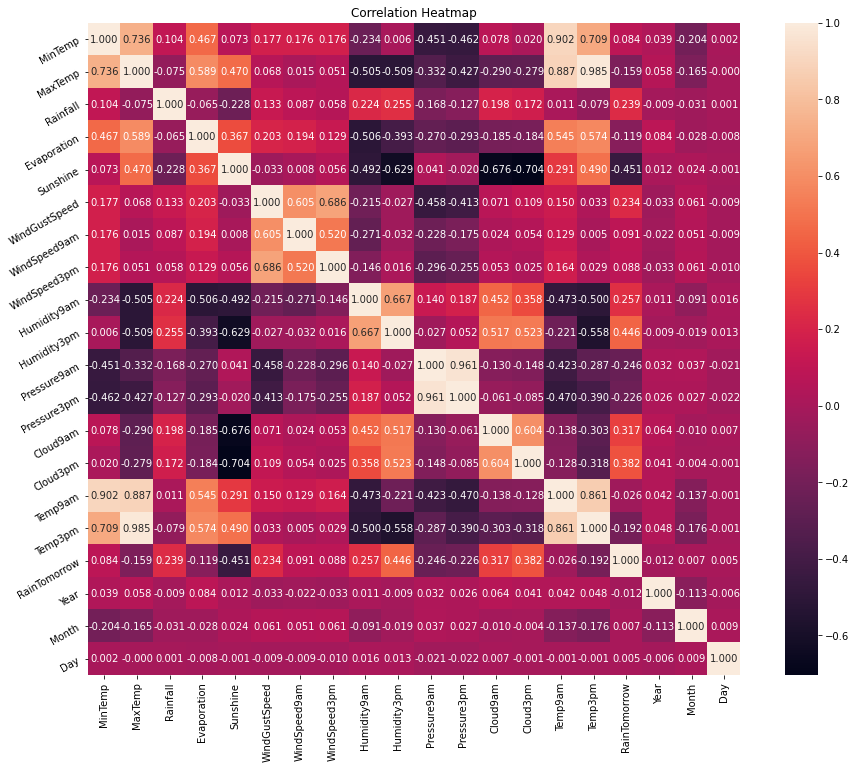

In [61]:
##plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, 
                 annot=True,
                 square=True,
                 fmt='.3f',
                 linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show()